# ML for climate and Energy (MEC51057)
# Group project: Weather station

**Mentor**:
- Julio 

**Students**:
- Dimitri Iratchet
- Fabien Lagnieu
- Tristan Waddington

# Draft for Tristan

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from utils import load_normalize_data

## 1. Data loading

In [2]:
X_train, X_test, y_train, y_test = load_normalize_data()

In [3]:
# Display shapes of the dataframes
print("Shapes of X_train dataframes:")
for key, value in X_train.items():
    print(f"{key}: {value.shape}")

print("\nShapes of X_test dataframes:")
for key, value in X_test.items():
    print(f"{key}: {value.shape}")

print("\nShapes of y_train dataframes:")
for key, value in y_train.items():
    print(f"{key}: {value.shape}")

print("\nShapes of y_test dataframes:")
for key, value in y_test.items():
    print(f"{key}: {value.shape}")

# Display available names of the dataframes
print("\nAvailable names in X_train:", X_train.keys())
print("Available names in X_test:", X_test.keys())
print("Available names in y_train:", y_train.keys())
print("Available names in y_test:", y_test.keys())

Shapes of X_train dataframes:
blh: (315569, 4)
d2m: (315569, 4)
skt: (315569, 4)
sp: (315569, 4)
ssrd: (315569, 4)
t2m: (315569, 4)
tcc: (315569, 4)
tp: (315569, 4)
u10: (315569, 4)
v10: (315569, 4)

Shapes of X_test dataframes:
blh: (35064, 4)
d2m: (35064, 4)
skt: (35064, 4)
sp: (35064, 4)
ssrd: (35064, 4)
t2m: (35064, 4)
tcc: (35064, 4)
tp: (35064, 4)
u10: (35064, 4)
v10: (35064, 4)

Shapes of y_train dataframes:
blh: (315569, 1)
d2m: (315569, 1)
skt: (315569, 1)
sp: (315569, 1)
ssrd: (315569, 1)
t2m: (315569, 1)
tcc: (315569, 1)
tp: (315569, 1)
u10: (315569, 1)
v10: (315569, 1)

Shapes of y_test dataframes:
blh: (35064, 1)
d2m: (35064, 1)
skt: (35064, 1)
sp: (35064, 1)
ssrd: (35064, 1)
t2m: (35064, 1)
tcc: (35064, 1)
tp: (35064, 1)
u10: (35064, 1)
v10: (35064, 1)

Available names in X_train: dict_keys(['blh', 'd2m', 'skt', 'sp', 'ssrd', 't2m', 'tcc', 'tp', 'u10', 'v10'])
Available names in X_test: dict_keys(['blh', 'd2m', 'skt', 'sp', 'ssrd', 't2m', 'tcc', 'tp', 'u10', 'v10'])
Avail

In [4]:
X_train["blh"]

,marseille,brest,london,berlin
time,,,,
1980-01-01 07:00:00,-0.304960,-1.059357,-1.242151,-0.238806
1980-01-01 08:00:00,-0.316641,-1.101772,-1.220804,-0.269736
1980-01-01 09:00:00,-0.221562,-1.113358,-1.179237,-0.221394
1980-01-01 10:00:00,0.065092,-0.956357,-1.079727,-0.246937
1980-01-01 11:00:00,0.367741,-0.869908,-0.953809,-0.291722
...,...,...,...,...
2015-12-31 19:00:00,-0.944583,-0.068515,0.634647,-1.061930
2015-12-31 20:00:00,-0.969334,-0.770546,0.879556,-1.099512
2015-12-31 21:00:00,-0.994027,-1.045022,0.538919,-1.114498


In [7]:
X_test["ssrd"]

,marseille,brest,london,berlin
time,,,,
2016-01-01 00:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2016-01-01 01:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2016-01-01 02:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2016-01-01 03:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2016-01-01 04:00:00,-0.712484,-0.668714,-0.645102,-0.641052
...,...,...,...,...
2019-12-31 19:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2019-12-31 20:00:00,-0.712484,-0.668714,-0.645102,-0.641052
2019-12-31 21:00:00,-0.712484,-0.668714,-0.645102,-0.641052


In [ ]:
# Display correlation matrix between cities

X_train.correlation()

## 2. Model instantiation

### 2.1 Baseline model
Predict the values of Paris weather station

In [ ]:
# Baseline model: Linear regression for each variable

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

variables_names = list(X_train.keys())
# Create a linear regression model for each variable
models_per_variable = {}
baseline_mse_per_variable = {}
for variable in variables_names:
    model = LinearRegression()
    model.fit(X_train[variable], y_train[variable])
    models_per_variable[variable] = model
    baseline_mse_per_variable[variable] = []
    # Evaluate per year
    for year in [2016, 2017, 2018, 2019]:
        y_pred = model.predict(
            X_test[variable].iloc[X_test[variable].index.year == year]
        )
        mse = mean_squared_error(
            y_test[variable].iloc[y_test[variable].index.year == year], y_pred
        )
        baseline_mse_per_variable[variable].append(mse)
    # Evaluate for all years
    y_pred = model.predict(X_test[variable])
    mse = mean_squared_error(y_test[variable], y_pred)
    baseline_mse_per_variable[variable].append(mse)

# load into a dataframe
baseline_df = pd.DataFrame(
    baseline_mse_per_variable, index=[2016, 2017, 2018, 2019, "all"]
)
baseline_df.style.background_gradient(cmap="Reds")


,blh,d2m,skt,sp,ssrd,t2m,tcc,tp,u10,v10
2016,0.348459,0.171876,0.100090,0.068001,0.177257,0.103704,0.860530,1.008765,0.250563,0.399177
2017,0.398556,0.163339,0.089868,0.066921,0.153841,0.104578,0.805775,1.158162,0.261364,0.421314
2018,0.374847,0.189975,0.110055,0.062597,0.166506,0.114463,0.889822,1.068445,0.279093,0.440647
2019,0.442302,0.180865,0.096738,0.064776,0.154317,0.098711,0.889952,1.391096,0.282134,0.426654
all,0.391012,0.176511,0.099188,0.065575,0.162990,0.105363,0.861519,1.156516,0.268276,0.421933


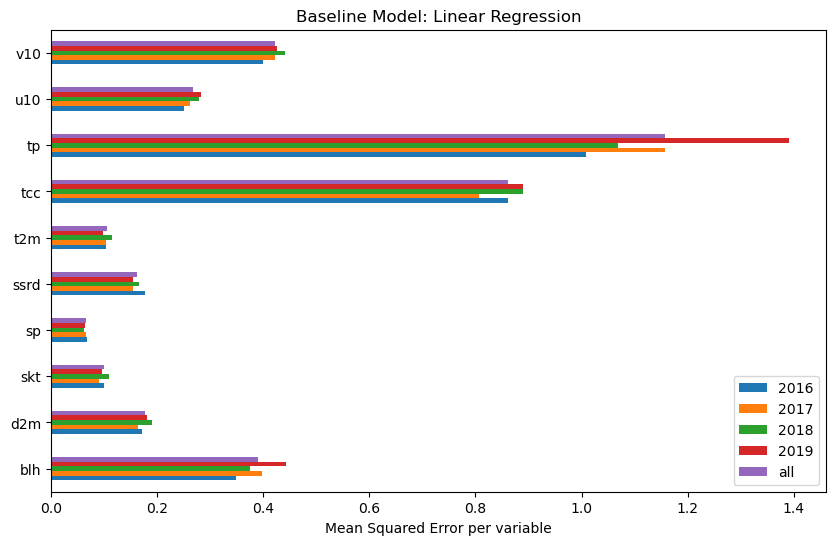

In [ ]:
# Plot the losses per variable
ax = baseline_df.T.plot(kind="barh", figsize=(10, 6))
ax.set_xlabel("Mean Squared Error per variable")
ax.set_title("Baseline Model: Linear Regression")
plt.show()